In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import pandas as pd
import seaborn as sns


## 1) Primer punto

In [485]:
def distanciaEuclidaneaCuadrada(punto1, punto2):
    return np.sum((punto1 - punto2) ** 2)

centroides_camino1 = []
centroides_camino2 = []

def KMeans2(D, k, epsilon):

    muestra, caracteristicas = np.shape(D)

    centroides = D[np.random.choice(muestra, k, replace=False)]
    t = 0
    centroides_camino1 = []
    centroides_camino2 = []
    while True:
        t += 1
        print(f'Iteración {t}')
        clusters = np.zeros(muestra)
        for i, punto in enumerate(D):
            clusters[i] = np.argmin([distanciaEuclidaneaCuadrada(punto, centroide) for centroide in centroides])
        centroides_nuevos = np.zeros((k, caracteristicas))

        for i in range(k):
            centroides_nuevos[i] = np.mean(D[clusters == i], axis=0)
        
        centroides_camino1.append(centroides_nuevos[0])
        centroides_camino2.append(centroides_nuevos[1])
                    
        if np.all(np.abs(centroides - centroides_nuevos) < epsilon):
            
            break

        centroides = centroides_nuevos
    return centroides, clusters, centroides_camino1, centroides_camino2


Iteración 1
Iteración 2


<function matplotlib.pyplot.show(close=None, block=None)>

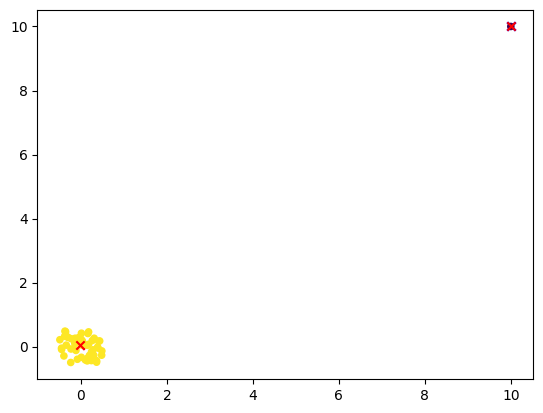

In [688]:
def dataset():
    A = np.random.uniform(low=-0.5, high=0.5, size=(50, 2))
    B = np.array([[10,10]])


    return np.concatenate((A, B))

P = dataset()
P = pd.DataFrame(P, columns=['x', 'y'])
centroides, clusters, camino1, camino2 = KMeans2(dataset(), k=2, epsilon=0.1)
camino1 = np.array(camino1)
camino2 = np.array(camino2)
cluster1_x, cluster1_y = camino1[:, 0], camino1[:, 1]
cluster2_x, cluster2_y = camino2[:, 0], camino2[:, 1]
plt.scatter(cluster1_x, cluster1_y, color='blue', label='Cluster 1', marker='x')
plt.scatter(cluster2_x, cluster2_y, color='red', label='Cluster 2', marker='x')
plt.scatter(dataset()[:, 0], dataset()[:, 1], c=clusters, s=20)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x')
plt.show

## 2) Segundo Punto

### K-Means


 Creación de dataset aleatorio con 3 posibles clusters a identificar

In [909]:
import numpy as np
from sklearn.datasets import make_blobs
A, y = make_blobs(n_samples=250, centers=3)


Converge en la iteración 5


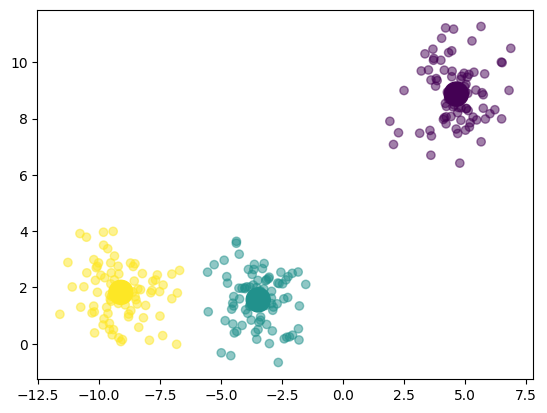

(array([0., 1., 0., 2., 1., 2., 2., 1., 2., 1., 0., 0., 0., 1., 2., 2., 1.,
        2., 1., 0., 0., 0., 1., 1., 0., 0., 2., 2., 0., 0., 0., 2., 0., 0.,
        2., 0., 0., 1., 0., 2., 2., 1., 0., 0., 2., 1., 1., 2., 0., 0., 0.,
        0., 2., 0., 1., 0., 2., 0., 1., 2., 1., 0., 1., 1., 0., 0., 1., 2.,
        2., 2., 2., 1., 1., 0., 0., 0., 1., 1., 0., 0., 2., 0., 1., 0., 1.,
        2., 2., 0., 0., 2., 2., 2., 1., 0., 2., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 0., 2., 2., 2., 0., 2., 1., 1., 2., 2., 1., 1., 0., 2., 0.,
        0., 0., 1., 1., 0., 2., 0., 2., 0., 1., 2., 2., 1., 2., 2., 2., 2.,
        1., 0., 0., 1., 1., 2., 0., 0., 0., 0., 1., 1., 0., 2., 2., 1., 0.,
        2., 2., 1., 2., 1., 0., 0., 0., 2., 2., 1., 2., 1., 1., 2., 2., 1.,
        2., 1., 1., 1., 2., 1., 0., 0., 2., 1., 0., 1., 2., 1., 1., 0., 2.,
        1., 2., 0., 1., 1., 1., 0., 2., 0., 2., 1., 2., 2., 2., 0., 0., 1.,
        0., 2., 1., 0., 2., 1., 2., 0., 1., 2., 2., 0., 2., 0., 0., 0., 1.,
        1., 

In [910]:

def kMeans(A, k, eps, mu):
    A = pd.DataFrame(A, columns=['x', 'y'])
    Dimensiones = A.shape[1]
    centroides_min = np.min(A)
    centroides_max = np.max(A)
    centroides = []

    def suma_errores_cuadrado(a,b):
        error = np.square(np.sum((a-b)**2))
        return error 
    if(mu is not None) and (mu != 0):
        if(len(mu) != k):
            print('El número de centroides no coincide con el número de clusters')
            return
        centroidesdf = pd.DataFrame(mu)
    else:
        for centroid in range(k):
            centroid = np.random.uniform(centroides_min, centroides_max, Dimensiones)
            centroides.append(centroid)
        centroidesdf = pd.DataFrame(centroides)
        
    
    
    errors = np.array([])
    c = np.zeros(A.shape[0])
    t = 0

    def recalcular_centroides(A, c, k):
        centroides_nuevos = []
        for j in range(k):
            if np.any(c == j):
                nuevo_centroide = np.mean(A[c == j], axis=0)
            else:
                nuevo_centroide = np.random.rand(A.shape[1])
            centroides_nuevos.append(nuevo_centroide)
        return np.array(centroides_nuevos)
        
    while(True):
        t += 1
        for i in range(A.shape[0]):  
            for centroid in range(centroidesdf.shape[0]):
                error = suma_errores_cuadrado(A.iloc[i,:2].values, centroidesdf.iloc[centroid, :2])
                errors = np.append(errors, error)
                c[i] = np.argmin(errors)
            errors = np.array([])
        centroides_nuevos = recalcular_centroides(A, c, k)
        
        if np.sum(np.abs(centroidesdf.values - centroides_nuevos)) <= eps:
            print(f'Converge en la iteración {t}')
            break
        centroidesdf = pd.DataFrame(centroides_nuevos)
    
    colors = {0: 'red', 1: 'blue', 2: 'green'}
    plt.scatter(A.iloc[:, 0], A.iloc[:, 1], marker='o', c=c, cmap='viridis', alpha=0.5)
    plt.scatter(centroidesdf.iloc[:, 0], centroidesdf.iloc[:, 1], marker='o', s=300, c=centroidesdf.index, cmap='viridis')

    plt.show()
    mu = []
    for j in range(k):
        if np.any(c == j):
            mu_cluster = np.mean(A[c == j], axis=0)
        mu.append(mu_cluster)
    mu = np.array(mu)
    return c, mu
mu = [([12.54647084, -2.21774142]),([10.44966911,  7.69955761]), ([8.32271066, 5.54315297])]
kMeans(A, 3, 0.1, None) #Asignar 0 o None para mu si se quiere que los centroides sean aleatorios

### DBSCAN 

In [954]:
import numpy as np
from scipy.spatial import distance
import seaborn as sns

def DBSCAN(D, epsilon, minpts):
    
    def find_distance(x):
        return distance.squareform(distance.pdist(x))

    def find_neighbors(x, epsilon):
        return np.where(x <= epsilon)[0]

    def expand_cluster(neighbors, cluster, labels, minpts):
        for neighbor in neighbors:
            if labels[neighbor] == -1:
                labels[neighbor] = cluster
                neighbor_neighbors = find_neighbors(dist_matrix[neighbor], epsilon)
                if len(neighbor_neighbors) >= minpts:
                    labels = expand_cluster(neighbor_neighbors, cluster, labels, minpts)
        return labels

    dist_matrix = find_distance(D)
    cluster = -1
    n_obs = D.shape[0]
    labels = np.full(n_obs, -1)
    for i in range(n_obs):
        if labels[i] == -1:
            neighbors = find_neighbors(dist_matrix[i], epsilon)
            if len(neighbors) > minpts:
                cluster += 1
                labels[i] = cluster
                labels = expand_cluster(neighbors, cluster, labels, minpts)
            else:
                labels[i] = -1  
    return labels

0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    2
297    2
298    2
299   -1
Name: dbscan_custom, Length: 2300, dtype: int64


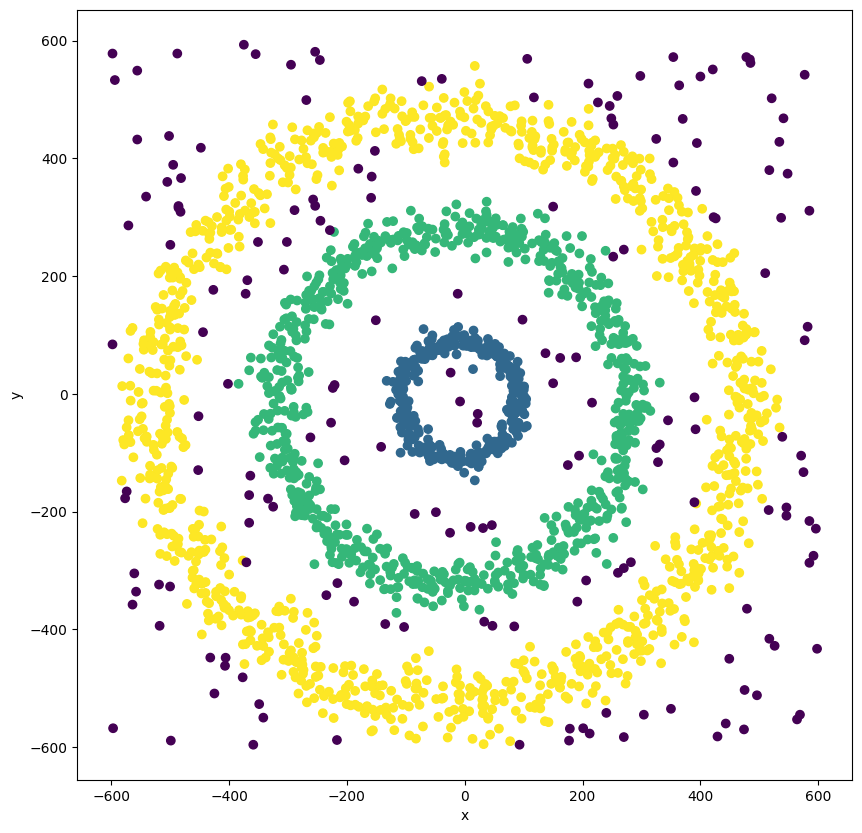

In [956]:
def make_circle(r, n, noise=30, seed=1234):
    np.random.seed(seed)
    return [(np.cos(2 * np.pi / n * x) * r + np.random.normal(-noise, noise), 
             np.sin(2 * np.pi / n * x) * r + np.random.normal(-noise, noise)) for x in range(1, n + 1)]

small_circle = make_circle(100, 300, 10)
medium_circle = make_circle(300, 700, 20)
big_circle = make_circle(500, 1000, 30)

noise = [(np.random.randint(-600, 600), np.random.randint(-600, 600)) for i in range(300)]

def array_to_df(arr, i):
    df = pd.DataFrame(arr)
    df['cluster'] = str(i)
    return df

D = [array_to_df(arr, i) for i, arr in enumerate([small_circle, medium_circle, big_circle, noise])]
D = pd.concat(D)
D.columns = ['x', 'y', 'cluster']

plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot(data=D, x='x', y='y', hue='cluster', legend=False)

D['dbscan_custom'] = DBSCAN(D[['x', 'y']].values, epsilon=32, minpts=5)

plt.scatter(D['x'], D['y'], c=D['dbscan_custom'], cmap='viridis')
plt.show()


## 3) Tercer Punto

#### a)

/var/folders/4k/4b01rf9j7cl6mcd3652m260w0000gn/T/ipykernel_67349/3646213762.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(A[indices, dimX], A[indices, dimY], A[indices, dimZ], c=cmap(i), label=cluster)


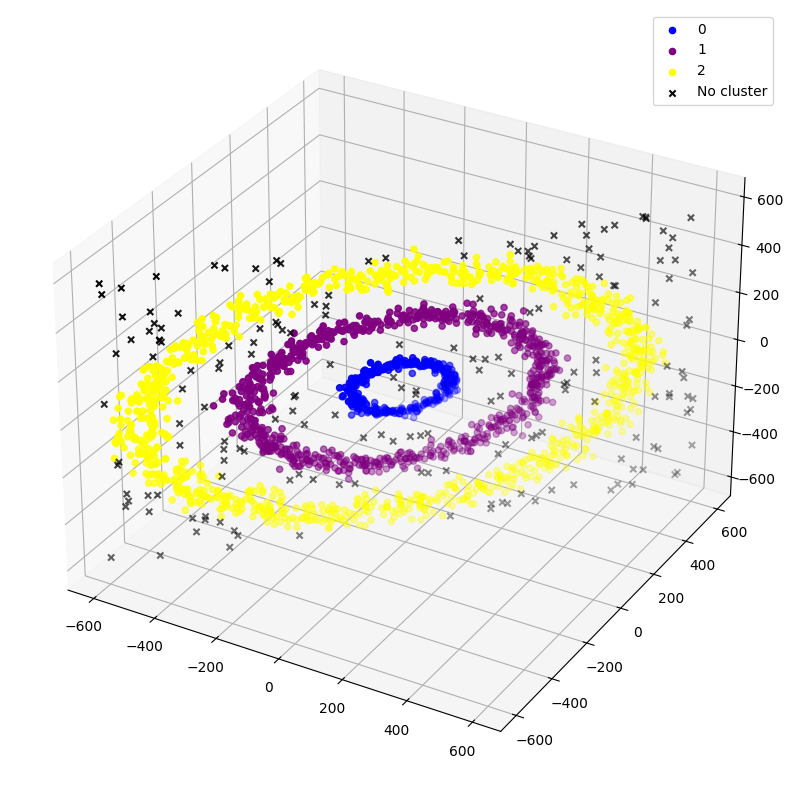

In [1029]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plotClusters(A, C, dimX, dimY, dimZ, ax): 

    if ax is None:
        if dimZ is None:
            fig, ax = plt.subplots()
        else:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
    else:
        fig = ax.get_figure()

    cmap = ListedColormap(['blue', 'purple', 'yellow', 'green', 'red', 'orange'])
    
    C = np.array(C)
    unique_clusters = np.where(C >= 0)
    unique_clusters = np.unique(C[unique_clusters])
    
    for i, cluster in enumerate(unique_clusters):
        indices = np.where(C == cluster)[0]
        if dimZ is None:
            ax.scatter(A[indices, dimX], A[indices, dimY], c=cmap(i), label=cluster)
        else:
            ax.scatter(A[indices, dimX], A[indices, dimY], A[indices, dimZ], c=cmap(i), label=cluster)
    
    indices = np.where(C == -1)[0]
    if dimZ is None:
        ax.scatter(A[indices, dimX], A[indices, dimY], c='k', marker='x', label='No cluster')
    else:
        ax.scatter(A[indices, dimX], A[indices, dimY], A[indices, dimZ], c='k', marker='x', label='No cluster')
        
    ax.legend()
    
    return ax


#Prueba con el anterior dataset
A = np.array([D['x'], D['y']]).T
C = D['dbscan_custom']
ax = plotClusters(A, C, dimX=0, dimY=0, dimZ=1, ax=None)

# Prueba de hacer 3 Dimensiones dandole el Ax ya creado
# A = np.random.rand(200, 3)
# num_clusters = 6
# C = np.zeros(A.shape[0], dtype=int)
# C[:num_clusters] = np.arange(num_clusters)
# centers = A[:num_clusters].mean(axis=0)
# for i in range(num_clusters, A.shape[0]):
#     distances = np.linalg.norm(A[i] - centers)
#     C[i] = np.argmin(distances)
# num_ungrouped = 10
# ungrouped_indices = np.random.choice(A.shape[0], size=num_ungrouped, replace=False)
# C[ungrouped_indices] = -1
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# plotClusters(A, C, 1, 1, 0, ax=ax)
    